In [1]:
import numpy as np
import torch

from kymatio.torch import HarmonicScattering3D
from kymatio.scattering3d.backend.torch_backend \
    import TorchBackend3D

# Reads Quijote halo catalogues
import readfof

import sys
sys.path.insert(1, '/home/fuffolo97/TESI/MyFunc')
from CalcWST import HaloWST

In [2]:
snapnum = 2
z_dict = {4:0.0, 3:0.5, 2:1.0, 1:2.0, 0:3.0}
redshift = z_dict[snapnum]

root = '/home/fuffolo97/TESI/Try_02-HaloCatalogue/Halos/'
folders = ['fiducial']

first_order_coeffs = []
second_order_coeffs = []

In [5]:
# do a loop over cosmologies (now only over the fiducial one)
for folder in folders:
    # do a loop over the different realizations
    # WST = None
    for i in range(2):
        snapdir = root + folder +'/%d'%i
        # if in future will be done for more than one value
        # of redshift, here another for loop over snapnum
        WST = HaloWST(snapdir)
        first_order_coeffs.append(WST[0])
        second_order_coeffs.append(WST[1])

In [15]:
np.shape(first_order_coeffs)

(2, 25)

In [9]:
import matplotlib.pyplot as plt

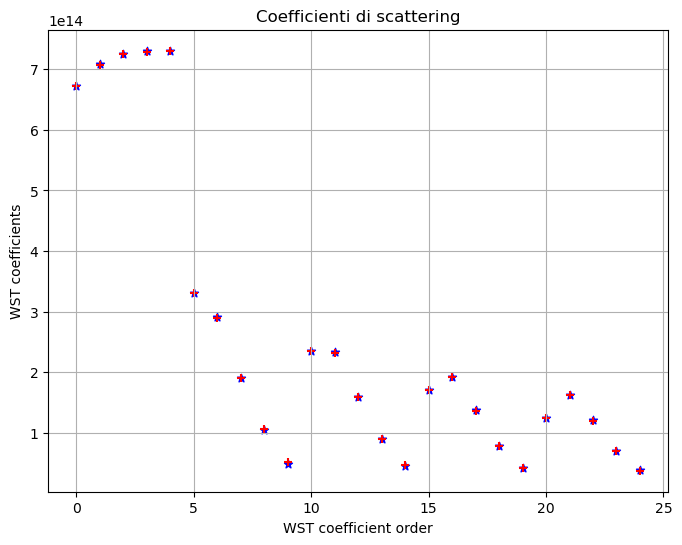

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(25), first_order_coeffs[0], marker="*", color="Blue")
plt.scatter(np.arange(25), first_order_coeffs[1], marker="+", color="Red")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering");

Separo i coeff del primo ordine in base al valore di J

In [20]:
a1_J0 = []
a1_J1 = []
a1_J2 = []
a1_J3 = []
a1_J4 = []

for i in range(0, np.shape(first_order_coeffs[0])[0]-1, 5):
    a1_J0.append(first_order_coeffs[0][i])
    a1_J1.append(first_order_coeffs[0][i+1])
    a1_J2.append(first_order_coeffs[0][i+2])
    a1_J3.append(first_order_coeffs[0][i+3])
    a1_J4.append(first_order_coeffs[0][i+4])

b1_J0 = []
b1_J1 = []
b1_J2 = []
b1_J3 = []
b1_J4 = []

for i in range(0, np.shape(first_order_coeffs[1])[0]-1, 5):
    b1_J0.append(first_order_coeffs[1][i])
    b1_J1.append(first_order_coeffs[1][i+1])
    b1_J2.append(first_order_coeffs[1][i+2])
    b1_J3.append(first_order_coeffs[1][i+3])
    b1_J4.append(first_order_coeffs[1][i+4])

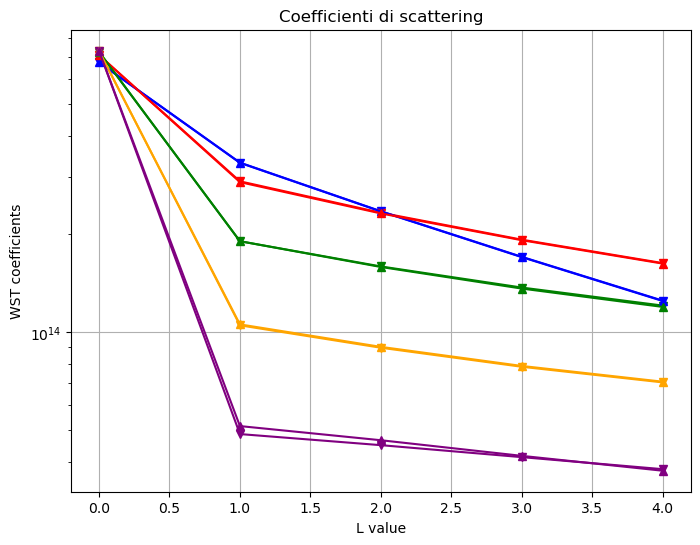

In [22]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(5), a1_J0, marker="v", color="Blue")
plt.plot(np.arange(5), a1_J1, marker="v", color="Red")
plt.plot(np.arange(5), a1_J2, marker="v", color="Green")
plt.plot(np.arange(5), a1_J3, marker="v", color="Orange")
plt.plot(np.arange(5), a1_J4, marker="v", color="Purple")
plt.plot(np.arange(5), b1_J0, marker="^", color="Blue")
plt.plot(np.arange(5), b1_J1, marker="^", color="Red")
plt.plot(np.arange(5), b1_J2, marker="^", color="Green")
plt.plot(np.arange(5), b1_J3, marker="^", color="Orange")
plt.plot(np.arange(5), b1_J4, marker="^", color="Purple")
plt.yscale('log')
plt.grid()
plt.xlabel("L value")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering");